In [1]:
import numpy as np
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from abc import ABCMeta, abstractmethod
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Linear Regression

#### Detailed process of how the features are selected, please look at the notebook(model_LR), following is the best model

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))

In [4]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [5]:
#  Description of the dataset
Description_data = {'Variable': ['zip code',
                                 'number_registration',
                                 'Population',
                                 'household count',
                                 '<10,000',
                                 '10,000~14,999',
                                 '15,000~24,999',
                                 '25,000~34,999',
                                 '35,000~49,999',
                                 '50,000~74,999',
                                 '75,000~99,999',
                                 '100,000~149,999',
                                 '150,000~199,999',
                                 '>200,000',
                                 'EV charging station number',
                                 'housing_price_index'],
                    
                    'Description': ['United States Zip Codes',
                                    'The number of electric vehicle registrations',
                                    'The number of Population',
                                    'The number of household',
                                    'The income less than \$10,000',
                                    'The income from \$10,000 to \$14,999',
                                    'The income from \$15,000 to \$24,999',
                                    'The income from \$25,000 to \$34,999',
                                    'The income from \$35,000 to \$49,999',
                                    'The income from \$50,000 to \$74,999',
                                    'The income from \$75,000 to \$99,999',
                                    'The income from \$100,000 to \$149,999',
                                    'The income from \$150,000 to \$199,999',
                                    'The income more than \$200,000',
                                    'EV charging station number',
                                    'housing price index'
                                   ]}

Description_table = pd.DataFrame(data=Description_data, index=['zip code',
                                                               'number_registration',
                                                               'Population',
                                                               'household count',
                                                               '<10,000',
                                                               '10,000~14,999',
                                                               '15,000~24,999',
                                                               '25,000~34,999',
                                                               '35,000~49,999',
                                                               '50,000~74,999',
                                                               '75,000~99,999',
                                                               '100,000~149,999',
                                                               '150,000~199,999',
                                                               '>200,000',
                                                               'EV charging station number',
                                                               'housing_price_index'])
Description_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Variable,Description
zip code,zip code,United States Zip Codes
number_registration,number_registration,The number of electric vehicle registrations
Population,Population,The number of Population
household count,household count,The number of household
"<10,000","<10,000","The income less than \$10,000"
"10,000~14,999","10,000~14,999","The income from \$10,000 to \$14,999"
"15,000~24,999","15,000~24,999","The income from \$15,000 to \$24,999"
"25,000~34,999","25,000~34,999","The income from \$25,000 to \$34,999"
"35,000~49,999","35,000~49,999","The income from \$35,000 to \$49,999"
"50,000~74,999","50,000~74,999","The income from \$50,000 to \$74,999"


In [6]:
data.columns = [
'Zip_code',
'Number_registration',
'Population',
'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
'150000to199999',
'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

In [7]:
data.corr()

,Zip_code,Number_registration,Population,Household_count,Less_than_10000,10000to14999,15000to24999,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,More_than_200000,EV_charging_station_number,Housing_price_index
Zip_code,1.000000,-0.560675,-0.274067,-0.307336,0.172310,0.207461,0.374355,0.351308,0.319722,0.216820,-0.079457,-0.340045,-0.438706,-0.443717,-0.248258,-0.556051
Number_registration,-0.560675,1.000000,0.667800,0.710470,-0.190113,-0.330070,-0.427181,-0.432270,-0.443963,-0.404947,0.052155,0.396289,0.628389,0.704902,0.417548,0.816300
Population,-0.274067,0.667800,1.000000,0.982454,-0.023831,-0.204565,-0.159393,-0.167895,-0.211256,-0.174889,0.133700,0.166918,0.266496,0.224121,0.258704,0.668722
Household_count,-0.307336,0.710470,0.982454,1.000000,-0.001950,-0.193053,-0.156807,-0.176619,-0.228123,-0.206830,0.112308,0.166539,0.280854,0.254496,0.334510,0.719770
Less_than_10000,0.172310,-0.190113,-0.023831,-0.001950,1.000000,0.301747,0.437142,0.246241,0.003324,-0.218999,-0.211997,-0.359535,-0.370015,-0.276957,0.121224,-0.058866
10000to14999,0.207461,-0.330070,-0.204565,-0.193053,0.301747,1.000000,0.463554,0.272347,0.133087,-0.080471,-0.182824,-0.483755,-0.401137,-0.365410,-0.039394,-0.243117
15000to24999,0.374355,-0.427181,-0.159393,-0.156807,0.437142,0.463554,1.000000,0.401396,0.326289,0.028941,-0.298700,-0.633605,-0.577593,-0.509545,-0.103129,-0.313299
25000to34999,0.351308,-0.432270,-0.167895,-0.176619,0.246241,0.272347,0.401396,1.000000,0.333483,0.176920,-0.299535,-0.569441,-0.505113,-0.513768,-0.150369,-0.337624
35000to49999,0.319722,-0.443963,-0.211256,-0.228123,0.003324,0.133087,0.326289,0.333483,1.000000,0.202819,-0.313543,-0.493065,-0.478091,-0.445591,-0.193813,-0.336723
50000to74999,0.216820,-0.404947,-0.174889,-0.206830,-0.218999,-0.080471,0.028941,0.176920,0.202819,1.000000,-0.089364,-0.166056,-0.443383,-0.459670,-0.210714,-0.308421


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [9]:
y = data["Number_registration"]
X = data.drop(['Number_registration'], axis =1).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [10]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
# Choose the features to be used
subcols_More_than_200000_Household_count_150000to199999= [
# 'Zip_code',
'Population',
#'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
#'150000to199999',
#'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

# y = data["Number_registration"]
# X = data.drop(['Number_registration',"Zip_code" ], axis =1).fillna(0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

X_train= X_train[subcols_More_than_200000_Household_count_150000to199999]
X_test = X_test[subcols_More_than_200000_Household_count_150000to199999]
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model_More_than_200000_Household_count_150000to199999= sm.OLS(y_train, X_train).fit() #ordinary least square
print(model_More_than_200000_Household_count_150000to199999.summary())
print('After remove More_than_200000,we get VIFs:')
print(VIF(data,subcols_More_than_200000_Household_count_150000to199999))

                             OLS Regression Results                            
Dep. Variable:     Number_registration   R-squared:                       0.841
Model:                             OLS   Adj. R-squared:                  0.835
Method:                  Least Squares   F-statistic:                     129.5
Date:                 Mon, 12 Dec 2022   Prob (F-statistic):          1.29e-100
Time:                         22:02:28   Log-Likelihood:                -1650.7
No. Observations:                  281   AIC:                             3325.
Df Residuals:                      269   BIC:                             3369.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## Regression Tree

In [11]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [12]:
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [13]:
grid_values = {'ccp_alpha': np.linspace(0, 1, 2001),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, cv=10, verbose=0, scoring = 'r2')
dtr = dtr_cv_acc.fit(X_train, y_train)

In [14]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1- SSE/SST)

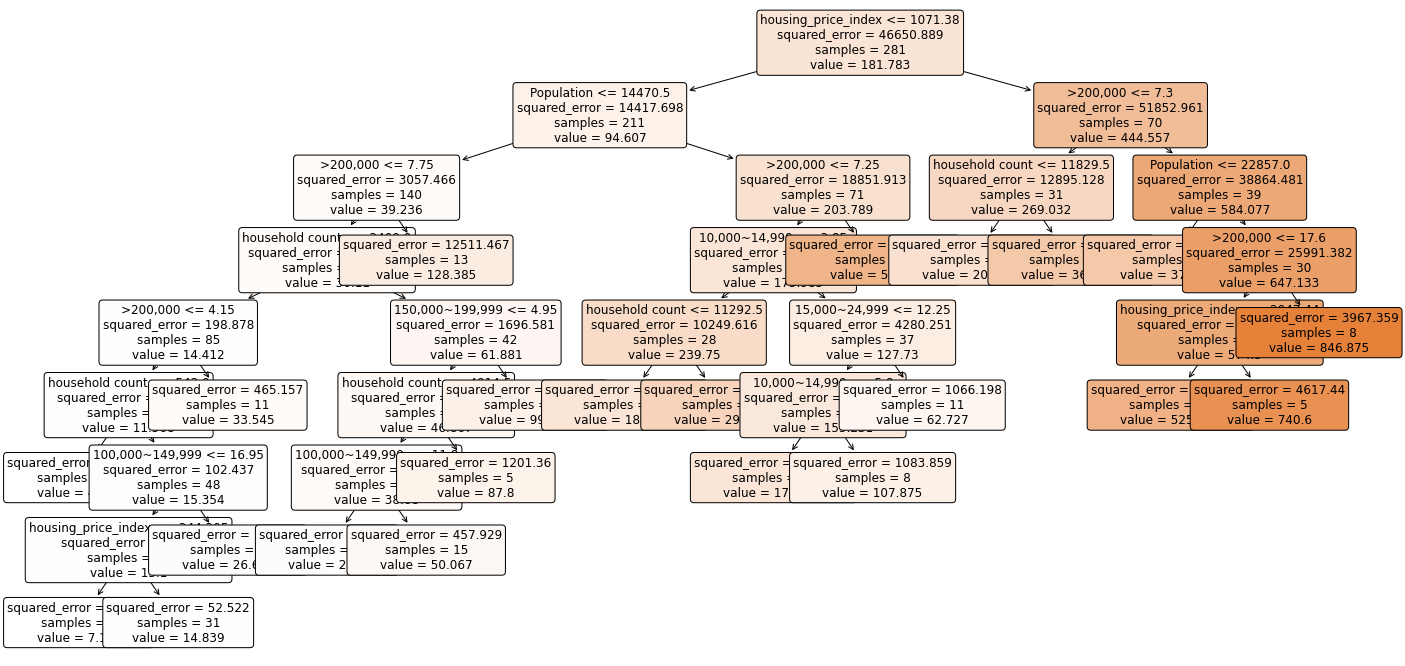

In [15]:
plt.figure(figsize=(24,12))
plot_tree(dtr_cv_acc.best_estimator_, 
          feature_names=X_train.columns,
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) #,max_depth=3)   # how deep to show
plt.show()

In [16]:
print("Regression Tree OSR2: ",OSR2(dtr, X_test, y_test, y_train))

Regression Tree OSR2:  0.8090644387025876


# Boosting

In [17]:
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))

In [18]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [19]:
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [20]:
boosting = GradientBoostingRegressor(random_state=88)
boosting.fit(X_train, y_train)
print("OSR2: ",OSR2(boosting, X_test, y_test, y_train))

OSR2:  0.9129423703112861


### Classification Tree 

In [21]:
bev_data = data.copy(deep=True)

In [22]:
bev_data['class'] = np.zeros(len(bev_data))
for i in range(len(bev_data)):
    if bev_data['number_registration'][i] < 50:
        bev_data['class'][i] = 'A'
    
    elif bev_data['number_registration'][i] < 200:
        bev_data['class'][i] = 'B'
    elif bev_data['number_registration'][i] < 400:
        bev_data['class'][i] = 'C'
    else:
        bev_data['class'][i] = 'D'

C:\Users\linzh\AppData\Local\Temp\ipykernel_27072\3867495291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['class'][i] = 'A'


In [23]:
y = bev_data['class']
X = bev_data.drop(['class', 'zip code', 'number_registration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dtc = DecisionTreeClassifier(class_weight = 'balanced',
                             min_samples_leaf= 3,
                             min_samples_split= 2,
                              random_state = 88)
cv = KFold(n_splits= 10, random_state= 88, shuffle = True)
grid_values = {'ccp_alpha': np.linspace(0,1,2001)}

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=0)


dtc_cv_acc = dtc_cv_acc.fit(X_train, y_train)

y_pred = dtc_cv_acc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 
print('Precision:',precision_score(y_test, y_pred, average = 'weighted'))
print('Recall:',recall_score(y_test, y_pred, average = 'weighted'))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

Confusion Matrix : 
 [[42  4  0  0]
 [10 22  7  1]
 [ 0  4 10  3]
 [ 0  0  2 16]]
Precision: 0.7424342802333234
Recall: 0.743801652892562


C:\Users\linzh\AppData\Local\Temp\ipykernel_27072\2264077292.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])


In [25]:
model_acc = dtc_cv_acc.best_score_ # TODO: calculate CV CART accuracy
print(f'CART Best Accuracy: {model_acc:.4f}')

CART Best Accuracy: 0.7187


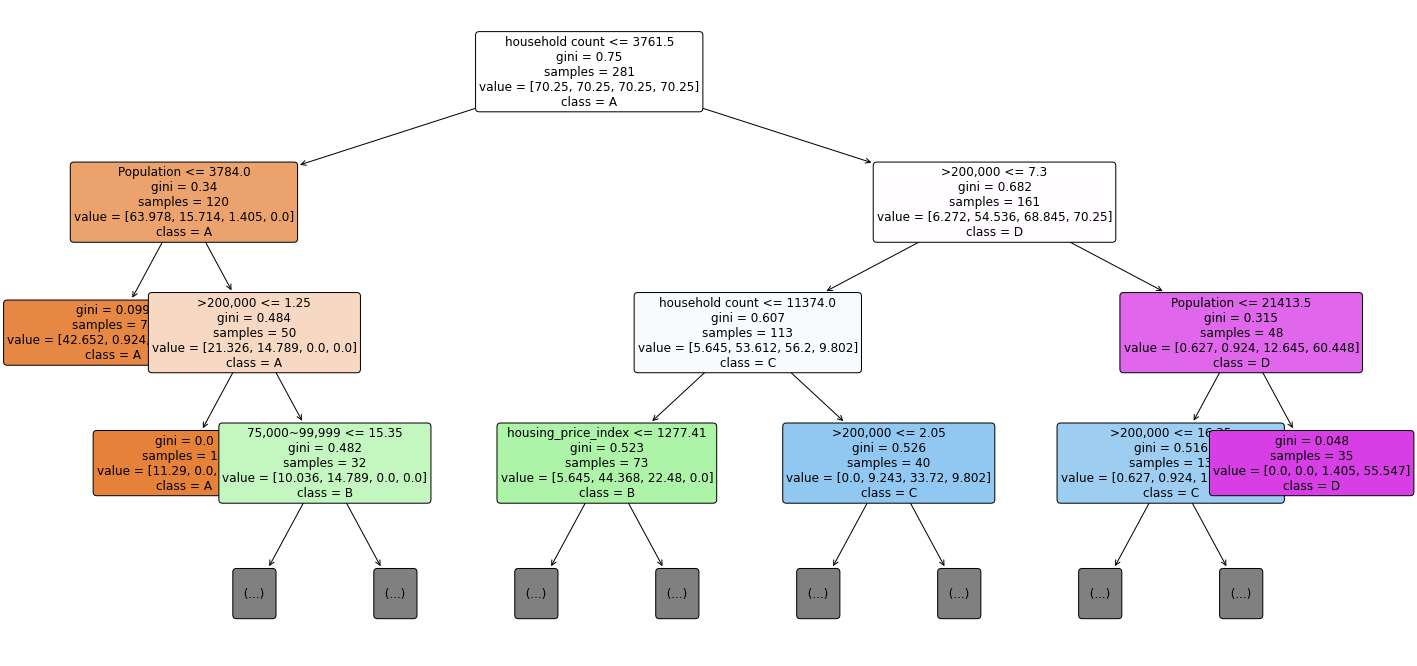

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['A','B','C','D'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

# CART BASELINE

In [27]:
ev_sales = pd.read_csv("../data_for_training/BEV_data_w_hpi.csv")

In [28]:
def OSR2(model, x_test, y_test, y_train): 
    y_pred = model.predict(x_test) 
    SSE = np.sum((y_test - y_pred)**2) 
    SST = np.sum((y_test - np.mean(y_train))**2) 

    return (1 - SSE/SST)

In [29]:
from sklearn.model_selection import train_test_split

y = ev_sales["number_registration"]
X = pd.get_dummies(ev_sales.drop(["number_registration","zip code"],axis=1)) 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88) 
x_train.shape, x_test.shape

((281, 14), (121, 14))

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold 

grid_values = {"ccp_alpha": np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

cv = KFold(n_splits=5, random_state=1, shuffle=True) 

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0) 
dtr_cv.fit(x_train, y_train)
print(dtr_cv)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')


[0.0 2e-05 4e-05 6.000000000000001e-05 8e-05 0.0001 0.00012000000000000002
 0.00014000000000000001 0.00016 0.00018 0.0002 0.00022
 0.00024000000000000003 0.00026000000000000003 0.00028000000000000003
 0.00030000000000000003 0.00032 0.00034 0.00036 0.00038 0.0004 0.00042
 0.00044 0.00046 0.00048000000000000007 0.0005 0.0005200000000000001
 0.00054 0.0005600000000000001 0.00058 0.0006000000000000001 0.00062
 0.00064 0.0006600000000000001 0.00068 0.0007000000000000001 0.00072
 0.0007400000000000001 0.00076 0.0007800000000000001 0.0008
 0.0008200000000000001 0.00084 0.0008600000000000001 0.00088
 0.0009000000000000001 0.00092 0.0009400000000000001 0.0009600000000000001
 0.0009800000000000002 0.001]
[0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.676

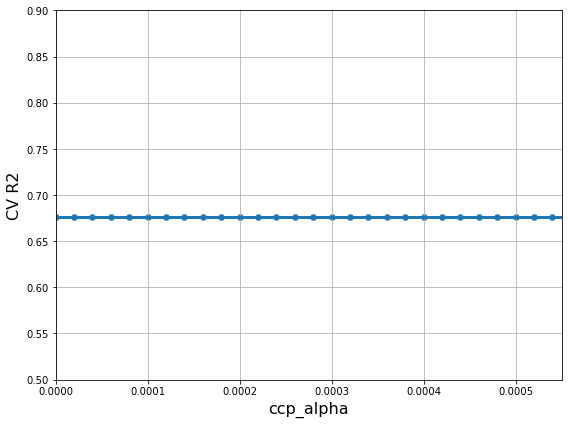

In [31]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data 
print(ccp_alpha)
R2_scores = dtr_cv.cv_results_['mean_test_score'] 
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('ccp_alpha', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.5, 0.9])

plt.tight_layout()
plt.show()

In [32]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0}


In [33]:
#Model Evaluation 

print('Cross-validated R2:', round(dtr_cv.best_score_,5))
print('OSR2:', round(OSR2(dtr_cv, x_test, y_test, y_train), 5))

Cross-validated R2: 0.67646
OSR2: 0.80895


##  Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                            n_estimators = 500, random_state=88, verbose=2)

rf.fit(x_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81

building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [35]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, x_test, y_test, y_train), 5))

OSR2: 0.90089


In [36]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,Population,15.1
1,household count,18.9
2,"<10,000",0.4
3,"10,000~14,999",0.8
4,"15,000~24,999",1.3
5,"25,000~34,999",2.9
6,"35,000~49,999",3.6
7,"50,000~74,999",2.7
8,"75,000~99,999",1.2
9,"100,000~149,999",1.5


In [37]:
## Using GridSearchCV to find best max_features 

import time 

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'), 
                'min_samples_leaf': [5],
                'n_estimators': [500], 
                'random_state': [88]} 

time0 = time.time()

rf2 = RandomForestRegressor()

cv = KFold(n_splits=5, random_state=333, shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv, verbose=2) 
rf_cv.fit(x_train, y_train) 

time1 = time.time()

print('time:', round(time1-time0, 2), 's')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_e

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.0s


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self.

time: 27.57 s


[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]
[0.78851729 0.84660658 0.86452522 0.87088066 0.87425111 0.87168086
 0.87288996 0.87146969 0.86929908 0.86770868 0.86553493 0.8625417
 0.86127429 0.85921783        nan        nan        nan        nan]


(0.7, 0.9)

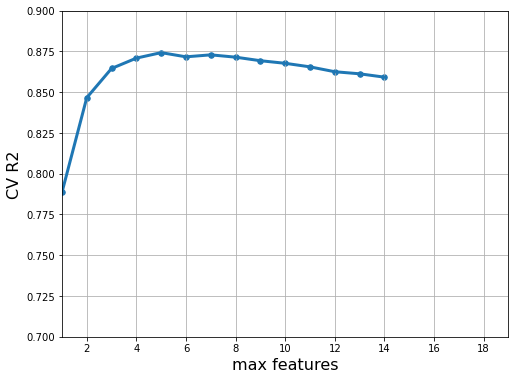

In [38]:
max_features = rf_cv.cv_results_['param_max_features'].data 
print(max_features)
R2_scores = rf_cv.cv_results_['mean_test_score']
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('max features', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.7, 0.9])

In [39]:
print(rf_cv.best_params_)

{'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [40]:
# Evaluate model performance 
print('Cross-validated R2:', round(rf_cv.best_score_, 5)) 
print('OSR2:', round(OSR2(rf_cv, x_test,y_test,y_train), 5))

Cross-validated R2: 0.87425
OSR2: 0.90089


In [41]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,Population,15.1
1,household count,18.9
2,"<10,000",0.4
3,"10,000~14,999",0.8
4,"15,000~24,999",1.3
5,"25,000~34,999",2.9
6,"35,000~49,999",3.6
7,"50,000~74,999",2.7
8,"75,000~99,999",1.2
9,"100,000~149,999",1.5


<BarContainer object of 14 artists>

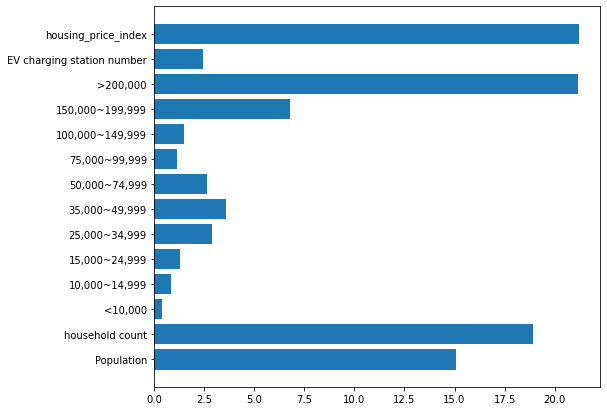

In [42]:
#visualize feature importances 

plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)

# Boostrap Testing

In [43]:
def read_data(path):
    data = pd.read_csv(path)
    return data
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [44]:
def OSR2(model, x_test, y_test, y_train): 
    y_pred = model.predict(x_test) 
    SSE = np.sum((y_test - y_pred)**2) 
    SST = np.sum((y_test - np.mean(y_train))**2) 

    return (1 - SSE/SST)

In [45]:
from sklearn.metrics import accuracy_score
def perform_bootstrap(test_data, test_label, model,y_train, sample=500, random_state=88):# FILL IN ARGUMENTS) -> dict: 
    n_sample = sample
#     accuracy_array=np.zeros(n_sample)
#     accuracy_array[:]=np.nan
#     TPR_array = np.zeros(n_sample)
#     TPR_array[:] = np.nan
#     FPR_array = np.zeros(n_sample)
#     FPR_array[:]=np.nan
    boosting_array = np.zeros(n_sample)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True) 
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
#         bs_predicted = model.predict(bs_data)
        temp_OSR2 = OSR2(model, bs_data,bs_label,y_train)
#         temp_OSR2 = OSR2(model, x_test,y_test,y_train)
        boosting_array[bs_iter] = temp_OSR2
#         accuracy_array[bs_iter]=accuracy_score(bs_label, bs_predicted)
#         cm = confusion_matrix(bs_label, bs_predicted)
#         tn, fp, fn, tp = cm.ravel()
#         TPR_array[bs_iter]= (tp)/(tp+fn)
#         FPR_array[bs_iter] = (fp)/(tn+fp)
    boosting_df = pd.DataFrame(boosting_array)
    return boosting_df

In [46]:
boosting_OSR2_df =perform_bootstrap(X_test, y_test, boosting, y_train,
                          sample = 500)

In [47]:
def draw_performance_histogram(data, name):
    plt.figure()
    plt.hist(data, label=name)
    plt.legend()
    plt.show() 

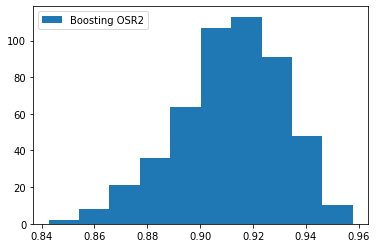

In [48]:
draw_performance_histogram(boosting_OSR2_df, "Boosting OSR2")

In [49]:
decision_tree_regressor_OSR2_df =perform_bootstrap(X_test, y_test, dtr_cv_acc, y_train,
                          sample = 500)

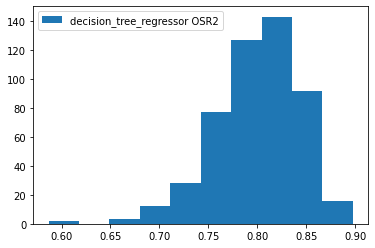

In [50]:
draw_performance_histogram(decision_tree_regressor_OSR2_df, "decision_tree_regressor OSR2")

In [51]:
random_forest_regressor_OSR2_df =perform_bootstrap(X_test, y_test, rf_cv, y_train,
                          sample = 500)

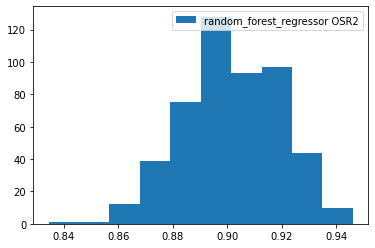

In [52]:
draw_performance_histogram(random_forest_regressor_OSR2_df, "random_forest_regressor OSR2")

In [53]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
    

In [54]:
data.columns = [
'Zip_code',
'Number_registration',
'Population',
'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
'150000to199999',
'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

In [55]:
y = data["Number_registration"]
X = data.drop(['Number_registration'], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [56]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
# Choose the features to be used
subcols_More_than_200000_Household_count_150000to199999= [
# 'Zip_code',
'Population',
#'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
#'150000to199999',
#'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

# y = data["Number_registration"]
# X = data.drop(['Number_registration',"Zip_code" ], axis =1).fillna(0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

X_train= X_train[subcols_More_than_200000_Household_count_150000to199999]
X_test = X_test[subcols_More_than_200000_Household_count_150000to199999]
X_train = sm.add_constant(X_train)

In [57]:
X_test = sm.add_constant(X_test)

In [58]:
linear_regression_OSR2_df = perform_bootstrap(X_test, y_test, model_More_than_200000_Household_count_150000to199999, y_train,
                          sample = 500)

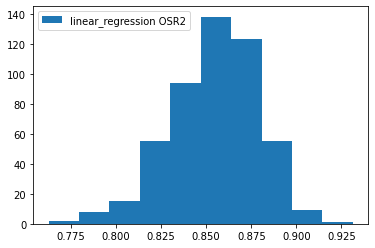

In [59]:
draw_performance_histogram(linear_regression_OSR2_df, "linear_regression OSR2")

In [60]:
from sklearn.metrics import accuracy_score
def perform_bootstrap_classfication(test_data, test_label, model, sample=500, random_state=88):# FILL IN ARGUMENTS) -> dict: 
        n_sample = sample
        accuracy_array=np.zeros(n_sample)
        accuracy_array[:]=np.nan
        TPR_array = np.zeros(n_sample)
        TPR_array[:] = np.nan
        FPR_array = np.zeros(n_sample)
        FPR_array[:]=np.nan
        for bs_iter in range(n_sample):
            bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True) 
            print(bs_index)
            bs_data = test_data.loc[bs_index]
            bs_label = test_label.loc[bs_index]
            bs_predicted = model.predict(bs_data) 
            accuracy_array[bs_iter]=accuracy_score(bs_label, bs_predicted)
            cm = confusion_matrix(bs_label, bs_predicted)
#             tn, fp, fn, tp = cm.ravel()
#             TPR_array[bs_iter]= (tp)/(tp+fn)
#             FPR_array[bs_iter] = (fp)/(tn+fp)
        accuracy_df = pd.DataFrame(accuracy_array)
#         TPR_df = pd.DataFrame(TPR_array)
#         FPR_df = pd.DataFrame(FPR_array)
        return accuracy_df
#         return accuracy_df, TPR_df, FPR_df

In [61]:
def read_data(path):
    data = pd.read_csv(path)
    return data
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [62]:
bev_data = data.copy(deep=True)

In [63]:
bev_data['class'] = np.zeros(len(bev_data))
for i in range(len(bev_data)):
    if bev_data['number_registration'][i] < 50:
        bev_data['class'][i] = 'A'
    
    elif bev_data['number_registration'][i] < 200:
        bev_data['class'][i] = 'B'
    elif bev_data['number_registration'][i] < 400:
        bev_data['class'][i] = 'C'
    else:
        bev_data['class'][i] = 'D'

C:\Users\linzh\AppData\Local\Temp\ipykernel_27072\3867495291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['class'][i] = 'A'


In [64]:
y = bev_data['class']
X = bev_data.drop(['class', 'zip code', 'number_registration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [65]:
accuracy_df_class_tree = perform_bootstrap_classfication(X_test, y_test, dtc_cv_acc,
                          sample = 500)

[ 14  14 267 275 341 180 384 357 174 395  82 275 363  69  36 294 363 116
 328  69  68  24 111 138 329 138 363 292 341 251 130 246  46 241 142  50
 344 300 390  53 363 267 229 160 139 275 116 294 130 280  50 339 338 270
 313 137 228 284 339 340 116 329  93 139 115   2 220  26 228 143 341 145
 341 235 170 252 160 343  68 339 280 340  93 138  12  46 138 384 118 179
 111 400 229 363  97 188  23  53 390  14  32  87 329 179 130 363 338 361
 370 171 277 153 136  36  19 185 340 329 363 390 109]
[185 277  70 234  36 188 271 271 313  19 329 186 277  76 203 341  85  92
 143 340 115 271  85 357 137 186  19 188   5 137  23 228 174 393  50  69
 316 147 205 330  22  53 240 270 267 400 165 363 145 138  69 227 400 179
 294 228 137  76 341 113  68 142 143 188 248 171  70 143  26 203 330  36
   9 111  14 305  45 310  50  85  14 310  63 167 111 258  50 274 111 118
 240 390 136 277  87 228 130  45 393 130 118 241  22 203 305 240 348   2
 136 240  19 341 217  97 109 228 118 252  36  70  19]
[111  19  93 280

[252 390 348 292 205 329 284 328 300  19 278 338 148 328  45 339 113 348
 357 310 243 228 205 339 142 185 113 309  50 188 227 329  23 358 252 159
 270 136 246  63 209  45   9 116 160 205  97 330  24  63 111  87 205  45
 235 330 390 313  50 143 217 205 366 227 113 248 115 228 280 366 137   2
 109 113  24 258 366  50 395   9  23 188 203 217 340 118 271  85 186  70
 243 116 180 252  92  69 339 217 248 329  30 113 160 374 138  36 160 280
 138 116 300 395 137  70  69 100 180  63 190 183 130]
[153 147  68 234 313 183 339 138  24 395 305 165 160 235   2  30 143 251
  82 180 165 274 274 246 118 284  45 240   2 235 293  68  85  36 258 393
 205 329 267  76 241 294 153 159 160 384 313 171 130 145 277 309 277 115
 100  19 277  36 143 357  45 148 217 138 277 148  45 243 294 252  26 190
 174 316 118 190 160 300 251 111 316 170 228 100 227  45 113 241  53 339
 217 270  93  97 395 240 179 142 313 275 170 185  23 185 240 170 348 227
 183 341 366 240 341 186  76 234 115   2 363  19 330]
[235 100 113  14

[ 92 147  26 243 138  50 170 209 227 328 209  69 167 305 309 180 258  14
 220  23  87  97 235 167 150 341 275 363 341  12  63  50 344  85  36 150
  53 145 100 138 113 316 370 148  23   9  63  76  24  30 267 139 274  46
  70 271 338   5 147 148 220 343 150 340 344  92  63  32 280 171 240 185
 370 341 344 241  14 271 143 217 316 325 277 205 115 190 229 294 390  14
 159 153 384 136 330 267  93 338  85 292 341 217 384 243  50  45 142  32
   9 240 205  45 294 147  97 170 148 109 305 113  30]
[366  87  32 188  69  26 358   5   9 159 393  69 344 167 220 150 310 309
 170  68 343 171  76 390 220 343 370 271  53 292 137 143 370 305 341 343
 234 180 235 118 111 275  12 344  82 113 252 330 348 139  36 325 228  82
 316 271  23 185  26 118 139 180 277 370  14 339 251  93 111 227 227 338
 284 190 138 258 328 205 220 330  76 348  50 341  68 227 267  19  24 293
 357 186  23 271 277  12 390 160 328 251 246 143 309 243 170 150 145  97
 235 220 267 137 267 358 267 148 240 280 390 390  68]
[ 26 340 343  87

[136 203  32 374 400 328 147 341 300  92 284   9  32 329 298 277 395 150
 145 284 139   2   2 174  30 170 305 370 118 361 153 167 271 136 390 180
 118 186  53 116 252 234  19 116 339 113 139 278 228  19 277  22 148  68
 274  14 180 293 228  30 209 137 310 136  76  50 143  53 358 267 366 243
 343 300 118 220 150 220  63 171 234 186 217 274 147 275  46  63 340 251
 109 338 116  22 310 316 241  22 316 393 159 313 358 186 251 174 271 160
 246  23 292 280 205 241  69 113 390 160 143 235 160]
[167 292 313 298  24 240 147 300 171 390 241 160 305 142  85 246 252 185
 330 116 143 330 243 220 217  30 243 109 370 309  19  92 251 300 217  26
 309 366 292 310 174 147 183 390 113 115 167 183  76 167 370  76 325 361
 227  82 180 310 138  82 284  24 241 234 179 188 348 174 325 179  26  12
   2 153 400  63 292  70 258  76 305  53 241 316 258  26  68  87 348 116
 329 171 340 374 203  30 340 343 217 271 248  26 170 338 205 310  45 344
 160 217 393  32 209  53  70 160 130 150  68 136 248]
[143 329 205  24

[136 313  70  12 130  23 235 248   5 203 384 203 171  45   2 366 313 209
 138  14 241 316  63  26 118  68 329 341 138  92 361 292 278 251 328  26
 186 234  76 310  93 203 209 159  12 251  32 228  87 138 243 188  63 271
 361 100 159 115 209 400  63 344 292  19 165  24  82 160 109 275 341 235
  92  14 186 115  53 329  23 243  50 316 348 227  63  82 174  68 393 384
 186 205 298 284 160 278 205 130 400 220 111 400 340 130  14 190 344 400
 305 300  97 143 220 361 280 309 278 142 165 136 339]
[294 171  93  23 174 167 270  87 310 316 274  92 171  53 338 305 329 116
 300 309  24  85 185 100 205 310 343  63  24 313 357 339 366  45  63 393
 235 188 116  70 111 241  93 203  50 228 316 384 170 358 393  87  53 400
 280 300 228 243 361  22 174 309 217  76  93 139 143 278 147 258 330 309
 275  19   5 100 118 366 130  69 142 153  82 183  97 300 228 390 137 188
 305 174 240 341  92 150 275 277 292 267 190 170 374 148 361 138 209  63
 330 305 228  69 203  76 185 165 205 118  70 338 305]
[284  82 344 228

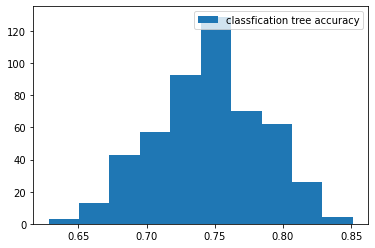

In [66]:
draw_performance_histogram(accuracy_df_class_tree, "classfication tree accuracy")

### Merge all bootstrap diagrams onto 1 plot

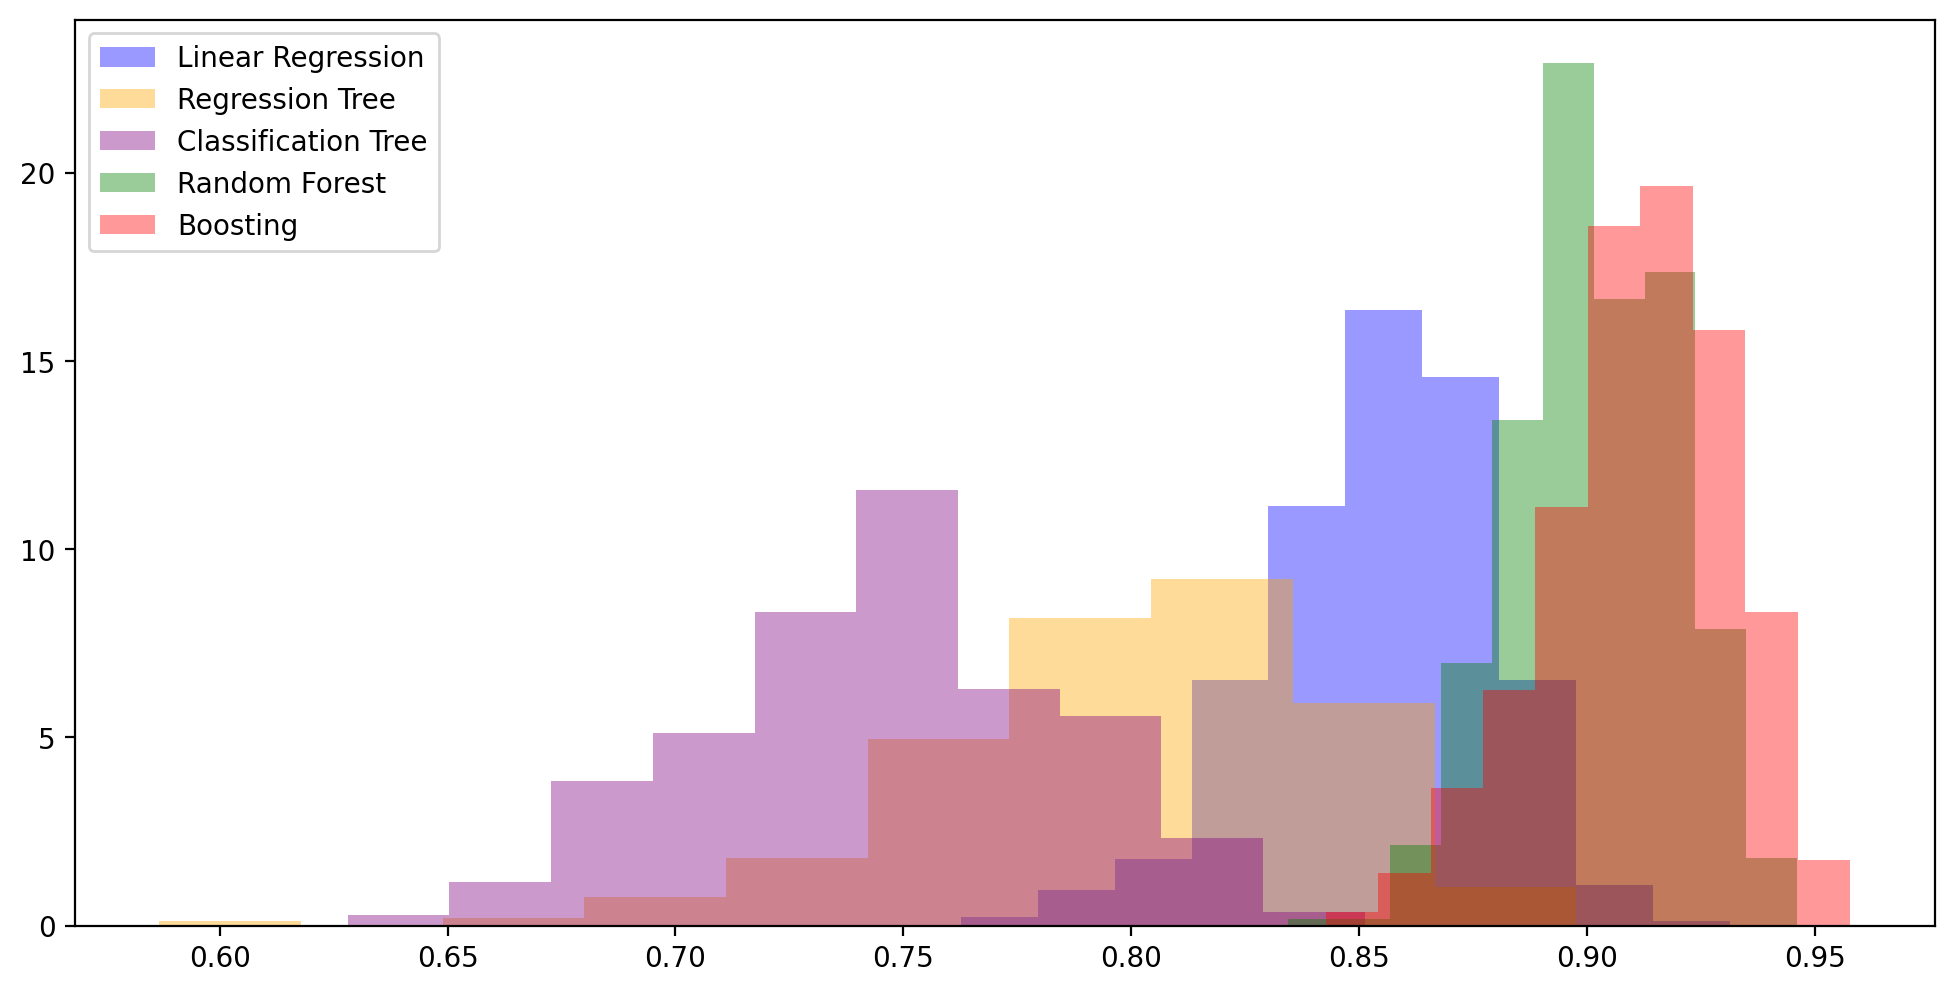

In [67]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200

plt.figure()
plt.hist(linear_regression_OSR2_df, label='Linear Regression', density=True, histtype='bar', color='blue', alpha=0.4)
plt.hist(decision_tree_regressor_OSR2_df, label='Regression Tree', density=True, histtype='bar', color='orange', alpha=0.4)
plt.hist(accuracy_df_class_tree, label='Classification Tree', density=True, histtype='bar', color='purple', alpha=0.4)
plt.hist(random_forest_regressor_OSR2_df, label='Random Forest', density=True, histtype='bar', color='green', alpha=0.4)
plt.hist(boosting_OSR2_df, label='Boosting', density=True, histtype='bar', color='red', alpha=0.4)
plt.legend()
plt.show() 